In [1]:
#imports libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression#逻辑回归
from sklearn.svm import SVC#支持向量机
from sklearn.neighbors import KNeighborsClassifier#KNN
from sklearn.naive_bayes import GaussianNB#朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier#决策树
from sklearn.ensemble import GradientBoostingClassifier#梯度提升分类树
from sklearn.ensemble import RandomForestClassifier#随机森林
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #混淆矩阵
from sklearn.metrics import roc_curve,auc#ROC，AUC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89973 entries, 0 to 89972
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_Income     89973 non-null  int64  
 1   First_Buy_Data      89973 non-null  int64  
 2   Last_Buy_Data       89973 non-null  int64  
 3   Average_Buy_Amount  89973 non-null  float64
 4   Frequency_Level     89973 non-null  int64  
 5   Buy_Amount_Grade    89973 non-null  object 
 6   Special_Buyer       89973 non-null  object 
 7   Last_Buy_Amount     89973 non-null  int64  
 8   Buy_Amount_Average  89973 non-null  float64
 9   Class               89973 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 6.9+ MB


d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


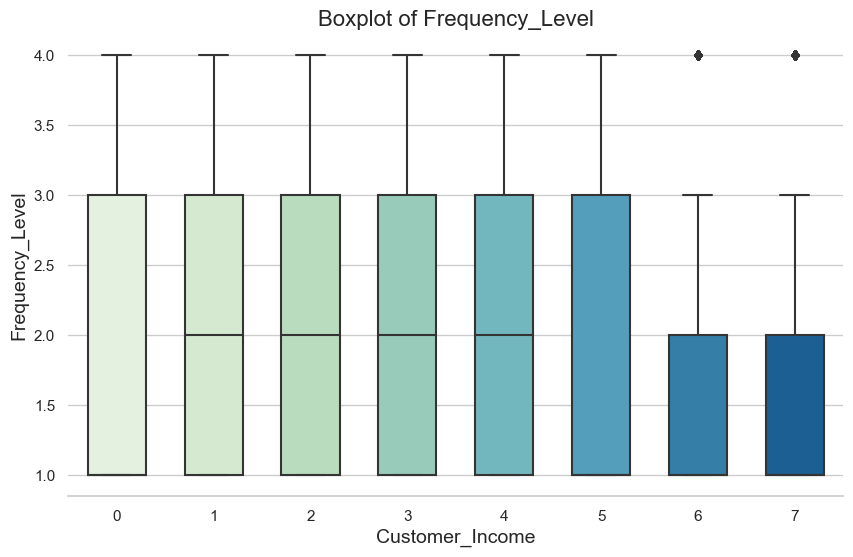

In [2]:
# load data
dataset = pd.read_csv("customer_data.csv")
#total info af dataset
dataset.info()
# display missing values of dataset
dataset.isnull()
#plot boxplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x="Customer_Income", y="Frequency_Level", data=dataset, palette="GnBu", width=0.6)
plt.title('Boxplot of Frequency_Level', fontsize=16)
plt.xlabel('Customer_Income', fontsize=14)
plt.ylabel('Frequency_Level', fontsize=14)
sns.despine(left=True)
plt.show()

In [3]:
# normalize First_Buy_Data & Last_Buy_Data columns
dataset[['First_Buy_Data']] = normalize(dataset[['First_Buy_Data']], axis=0)
dataset[['Last_Buy_Data']] = normalize(dataset[['Last_Buy_Data']], axis=0)
# Special_Buyer column unique values
print("Special_Buyer -> ", dataset['Special_Buyer'].unique())
# Special_Buyer column change pattern
special_buyer_replace = {'Special_Buyer': {'X': 1, '0': 0}}
# replace column values
dataset.replace(special_buyer_replace, inplace=True)
# Special_Buyer column after replace
print("Special_Buyer -> ", dataset['Special_Buyer'].unique())
# one-hot replacement
change_grade = pd.get_dummies(dataset['Buy_Amount_Grade'], prefix='grade')
dataset = pd.concat([dataset, change_grade], axis=1)
dataset.drop(['Buy_Amount_Grade'], axis=1, inplace=True)
dataset.head()

Special_Buyer ->  ['0' 'X']
Special_Buyer ->  [0 1]


,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Special_Buyer,Last_Buy_Amount,Buy_Amount_Average,Class,grade_D,grade_E,grade_F,grade_G
0,3,0.003433,0.003320,0.06,1,0,50,30.00,0,False,False,False,True
1,0,0.003470,0.003353,0.20,4,0,5,8.75,0,False,True,False,False
2,6,0.003433,0.003353,0.13,2,0,25,22.50,0,False,False,False,True
3,0,0.003396,0.003321,0.10,1,0,25,12.50,0,False,False,False,True
4,2,0.003503,0.003355,0.14,2,0,5,7.75,0,False,False,True,False


In [5]:
def barch(inx, tab1, tab2):
    l = len(inx[tab1].unique())
    df = pd.DataFrame(inx[tab1].unique(), columns=['tmp'])
    df.index = df['tmp'].values
    lists = inx[tab2].unique().tolist()
    for li in lists:
        counts = inx[tab1][inx[tab2] == li].value_counts()
        tmp = pd.DataFrame({str(li): counts})
        df = pd.concat([df, tmp], axis=1)
    df = df.drop(['tmp'], axis=1)
    df_count = pd.DataFrame(df.apply(lambda x: x.sum(), axis=1), columns=['counts'])
    df_percentage = pd.concat([df, df_count], axis=1)
    for col in df_percentage.columns:
        df_percentage[col] = round(df_percentage[col] / df_percentage['counts'] * 100, 2)
    df_percentage = df_percentage.drop(['counts'], axis=1)
    colors = sns.color_palette("Blues")
    fig, ax_arr = plt.subplots(1, 2, figsize=(12, 6))
    df.plot(kind='barh', stacked=True, color=colors, ax=ax_arr[0]).invert_yaxis()
    ax_arr[0].set_title(tab1 + ' vs ' + tab2)
    ax_arr[0].set_xlabel('number')
    ax_arr[0].set_ylabel(tab1)
    df_percentage.plot(kind='barh', stacked=True, color=colors, ax=ax_arr[1]).invert_yaxis()
    ax_arr[1].set_title(tab1 + ' vs ' + tab2)
    ax_arr[1].set_xlabel('percentage')
    ax_arr[1].set_ylabel(tab1)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.setp(ax_arr[0].get_xticklabels(), rotation=0, ha="right")
    plt.setp(ax_arr[1].get_xticklabels(), rotation=0, ha="right")
    plt.show()
    plt.tight_layout()


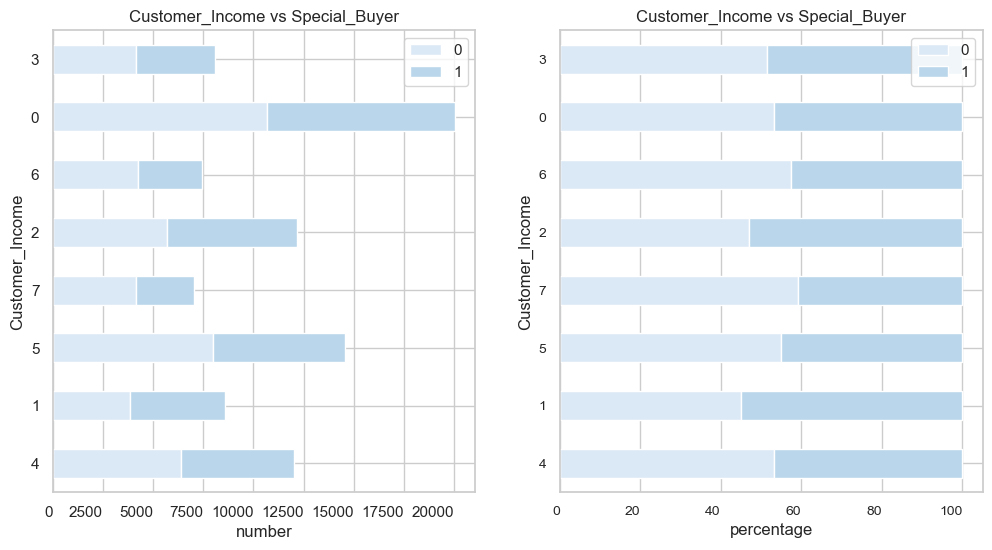

<Figure size 640x480 with 0 Axes>

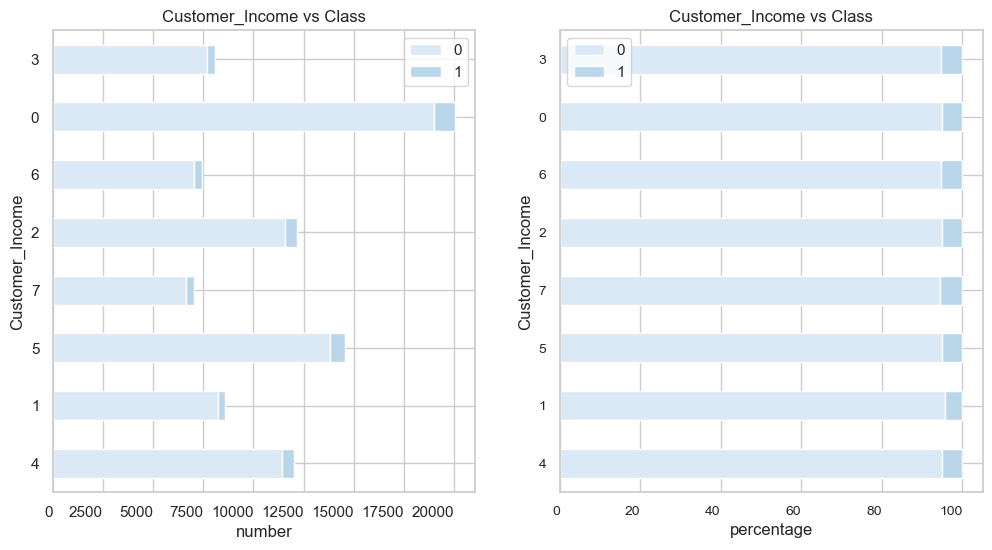

<Figure size 640x480 with 0 Axes>

In [6]:
# plot
barch(dataset,'Customer_Income','Special_Buyer')
barch(dataset, 'Customer_Income', 'Class')

d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

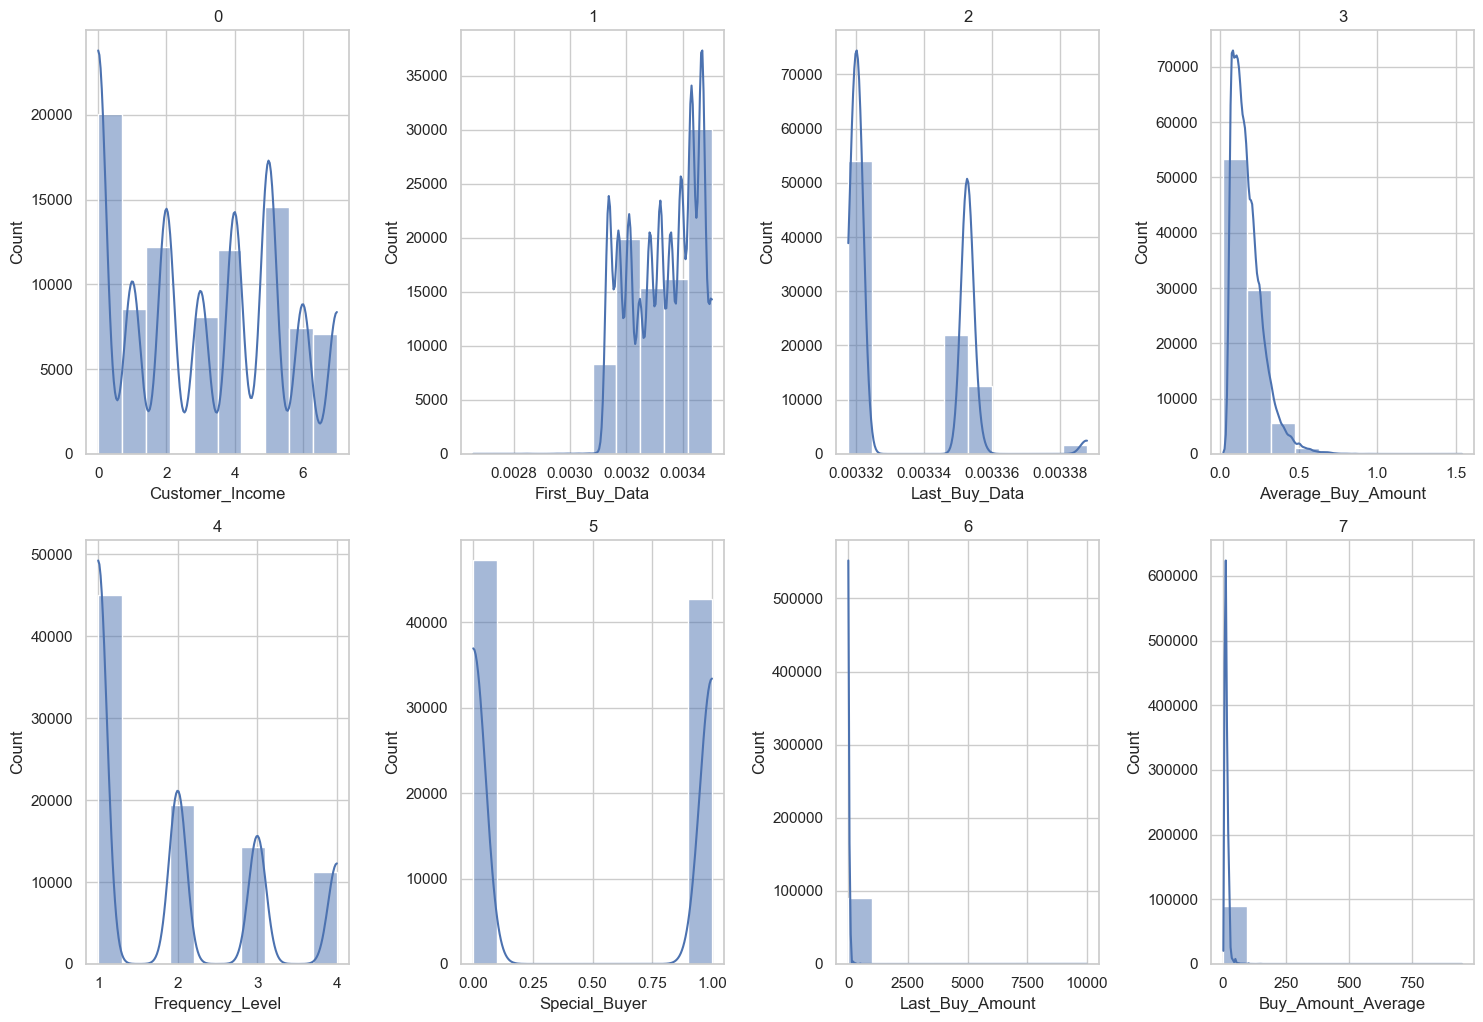

In [7]:
tmp = dataset.select_dtypes('number').drop(['Class'],axis=1)
cols = tmp.columns
plt.figure(figsize=(15, 15))
for j in range(len(cols)):
    ax = plt.subplot(3,4,j+1)
    ax.set_title(cols[j])
    sns.histplot(tmp.iloc[:,j],bins=10,kde=True,ax=ax)
    plt.title(j)
plt.tight_layout()
plt.show()

d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

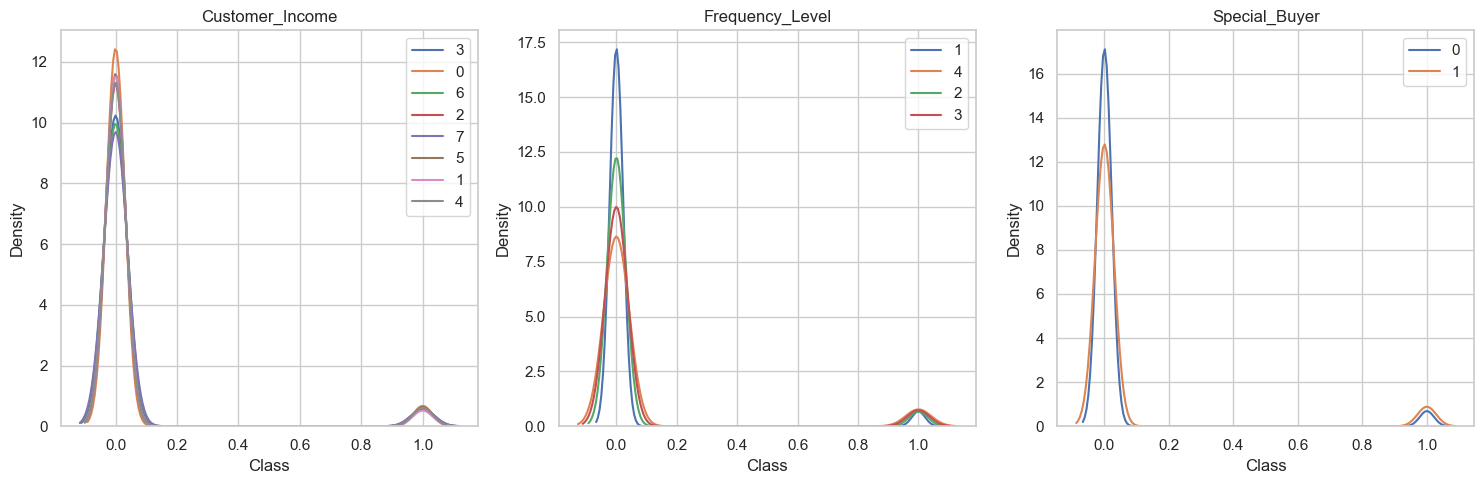

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
income_list=dataset.Customer_Income.unique()
for li in income_list:
    subest = dataset[dataset.Customer_Income==li]
    sns.kdeplot(data=subest['Class'])
plt.title('Customer_Income')
plt.legend(income_list)
plt.subplot(1,3,2)
level_list=dataset.Frequency_Level.unique()
for li in level_list:
    subest = dataset[dataset.Frequency_Level==li]
    sns.kdeplot(data=subest['Class'])
plt.title('Frequency_Level')
plt.legend(level_list)
plt.subplot(1,3,3)
buyer_list=dataset.Special_Buyer.unique()
for li in buyer_list:
    subest = dataset[dataset.Special_Buyer==li]
    sns.kdeplot(data=subest['Class'])
plt.title('Special_Buyer')
plt.legend(buyer_list)
plt.tight_layout()

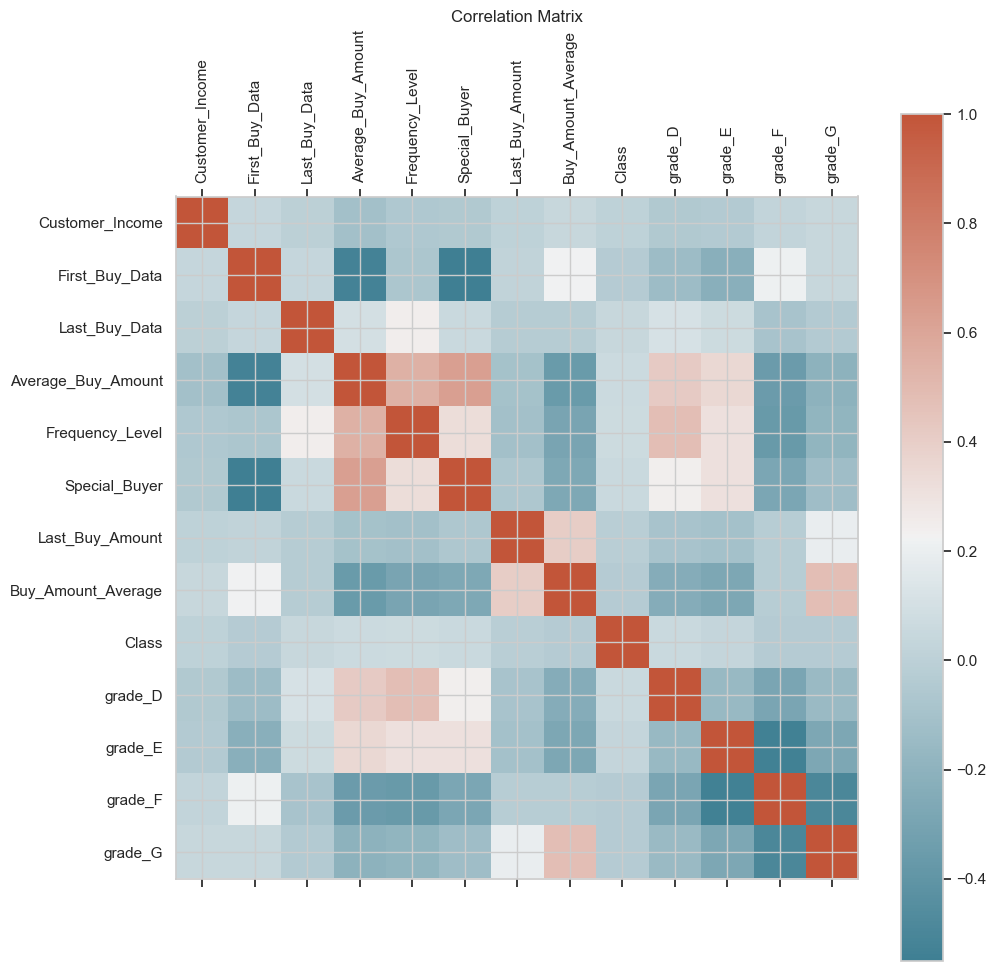

In [12]:
# Plotting correlation function with optimized color map and size
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    cax = ax.matshow(corr, cmap=cmap)
    plt.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Correlation Matrix')
plot_corr(dataset,size=11)

In [13]:
# train and test splits
# prediction features columns
feature_col_names = ['Customer_Income', 'First_Buy_Data', 'Last_Buy_Data', 'Average_Buy_Amount', 'Frequency_Level', 
          'grade_D', 'grade_E', 'grade_F', 'grade_G', 'Special_Buyer', 'Last_Buy_Amount', 'Buy_Amount_Average']
# prediction class column
predicted_class_names = ['Class']
# get feature columns values from dataset
X = dataset[feature_col_names].values
# get class column values from dataset
y = dataset[predicted_class_names].values
# split dataset features and prediction class to test and train parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# print size of test and train parts
print(X_train.shape)
print(X_test.shape)

(62981, 12)
(26992, 12)


In [15]:
# ROC curve
def pltROC(model, model_name, x_train, y_train, x_test, y_test, draw=True):
    y_lists = np.unique(np.insert(y_train, -1, y_test, axis=0))

    if len(y_lists) > 2:
        FPR, TPR, AUC, Gini = {}, {}, {}, {}

        for li in y_lists:
            y_train_copy = copy.deepcopy(y_train)
            y_test_copy = copy.deepcopy(y_test)
            y_train_copy[y_train_copy != li], y_train_copy[y_train_copy == li] = 0, 1
            y_test_copy[y_test_copy != li], y_test_copy[y_test_copy == li] = 0, 1

            model.fit(x_train, y_train_copy)

            try:
                y_pre = model.predict_proba(x_test)[:, -1]
            except:
                y_pre = model.decision_function(x_test)

            fpr, tpr, threasholds = metrics.roc_curve(y_test_copy, y_pre)
            FPR[li], TPR[li] = fpr, tpr
            AUC[li] = metrics.auc(fpr, tpr)
            Gini[li] = round((2 * AUC[li] - 1) * 100, 2)

        if draw:
            plt.figure(figsize=(8, 8))
            for li in y_lists:
                plt.plot(FPR[li], TPR[li], lw=2, label=str(li) + '类别,AUC=%.3f,Gini=%.0f%%' % (AUC[li], Gini[li]))

    else:
        AUC, Gini = None, None
        model.fit(x_train, y_train)

        try:
            y_pre = model.predict_proba(x_test)[:, 1]
        except:
            y_pre = model.decision_function(x_test)

        fpr, tpr, threasholds = metrics.roc_curve(y_test, y_pre)
        AUC = metrics.auc(fpr, tpr)
        Gini = round((2 * AUC - 1) * 100, 2)

        if draw:
            plt.figure(figsize=(8, 8))
            plt.plot(fpr, tpr, lw=2, label='AUC=%.3f,Gini=%.0f%%' % (AUC, Gini))

    if draw:
        plt.plot((0, 1), (0, 1), c='#a0a0a0', lw=2, ls='--')
        plt.xlim(-0.01, 1.02)
        plt.ylim(-0.01, 1.02)
        plt.xlabel('FPR', fontsize=16)
        plt.ylabel('TPR', fontsize=16)
        plt.title('ROC/AUC of ' + model_name +' model test samples', fontsize=18)
        plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
        plt.show()

    return AUC, Gini

d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

92.36


d:\Anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


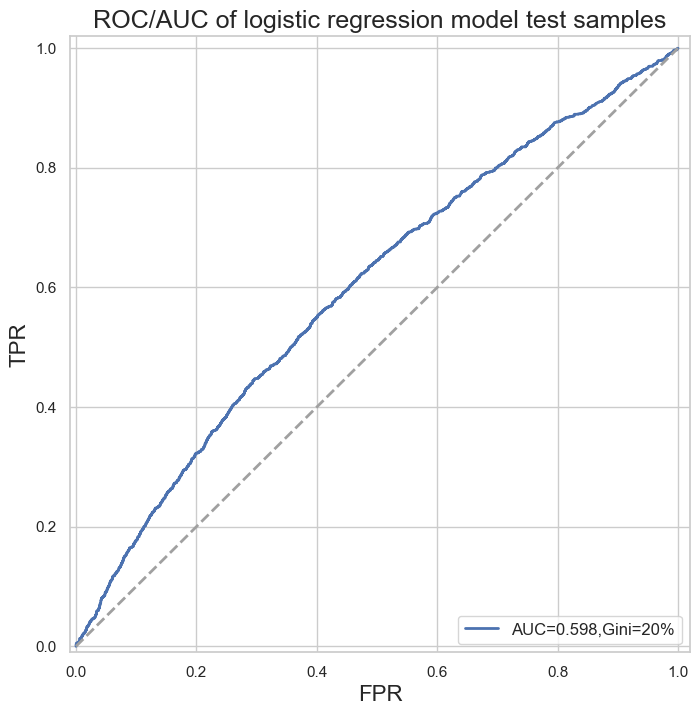

(0.597700704823755, 19.54)

In [16]:
# 逻辑回归
log = LogisticRegression(random_state=123)
log_score = cross_val_score(log, X_train, y_train, scoring='f1_weighted',cv=5)
log_score = round(log_score.mean()*100,2)
print(log_score)
pltROC(log,'logistic regression',X_train,y_train,X_test, y_test)

d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

88.05


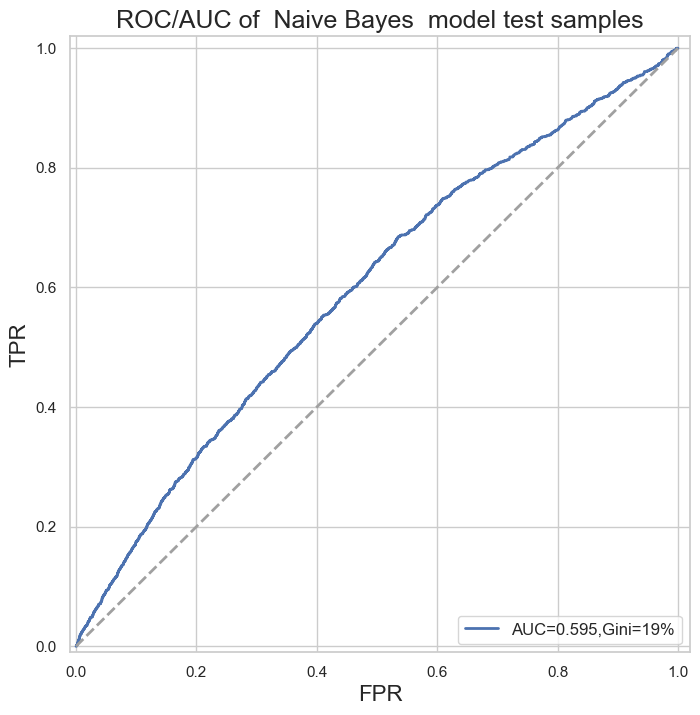

(0.5949699278721663, 18.99)

In [17]:
# Naive Bayes
bys = GaussianNB()
bys_score = cross_val_score(bys, X_train, y_train, scoring='f1_weighted',cv=5)
bys_score = round(bys_score.mean()*100,2)
print(bys_score)
pltROC(bys,' Naive Bayes ',X_train,y_train,X_test, y_test)


89.88


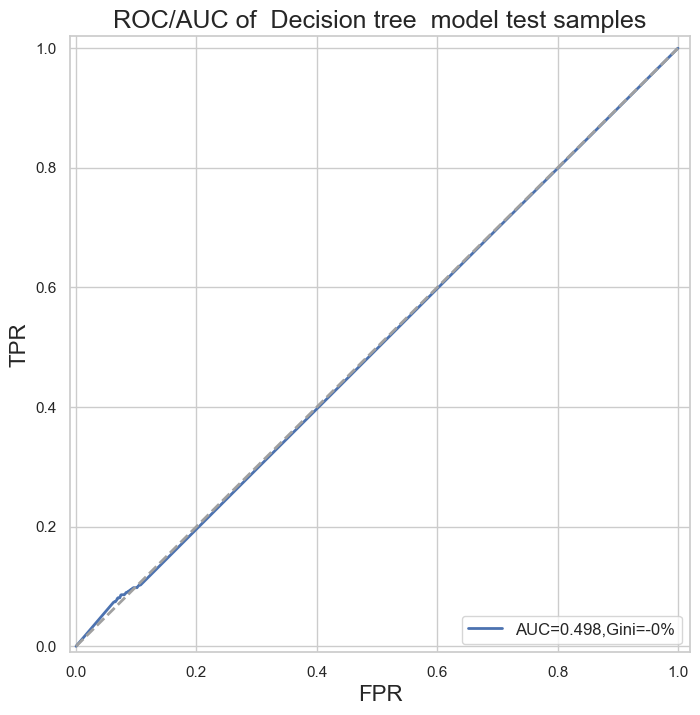

(0.4984575265522606, -0.31)

In [18]:
# decision tree
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree_score = cross_val_score(decision_tree, X_train, y_train, scoring='f1_weighted',cv=5)
decision_tree_score = round(decision_tree_score.mean()*100,2)
print(decision_tree_score)
pltROC(decision_tree,' Decision tree ',X_train,y_train,X_test, y_test)

d:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

92.36


d:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


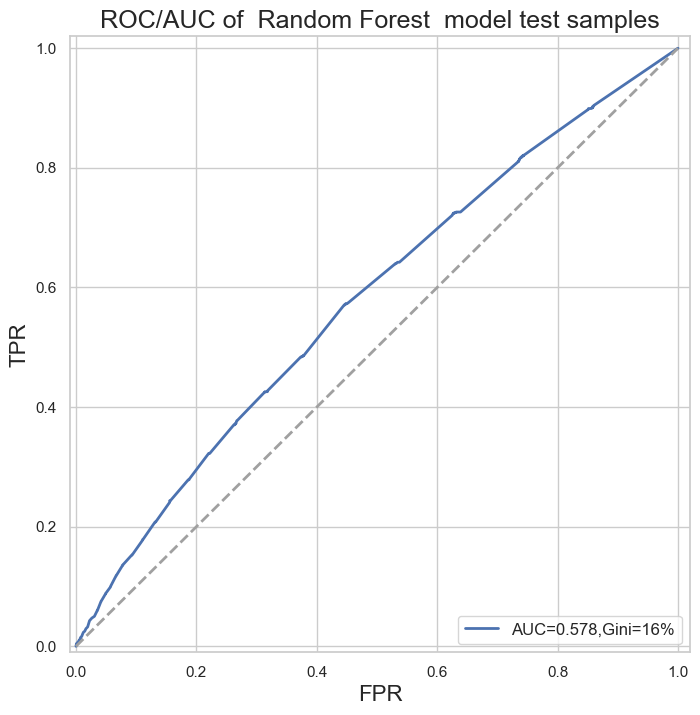

(0.5781131161749806, 15.62)

In [19]:
# random forest
random_forest = RandomForestClassifier(random_state=123)#n_estimators:默认100
random_forest_score = cross_val_score(random_forest, X_train, y_train, scoring='f1_weighted',cv=5)
random_forest_score = round(random_forest_score.mean()*100,2)
print(random_forest_score)
pltROC(random_forest,' Random Forest ',X_train,y_train,X_test, y_test)

d:\Anaconda\envs\ml\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

92.38


d:\Anaconda\envs\ml\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


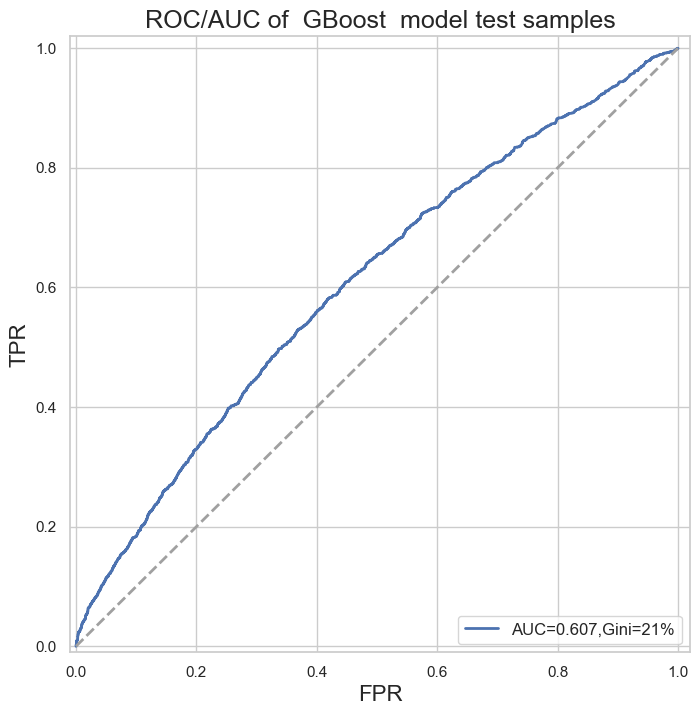

(0.6070472120112016, 21.41)

In [20]:
# GBoost
GB_forest = GradientBoostingClassifier(random_state=123)#n_estimators:默认100
GB_forest_score = cross_val_score(GB_forest, X_train, y_train, scoring='f1_weighted',cv=5)
GB_forest_score = round(GB_forest_score.mean()*100,2)
print(GB_forest_score)
pltROC(GB_forest,' GBoost ',X_train,y_train,X_test, y_test)

d:\Anaconda\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

92.36


d:\Anaconda\envs\ml\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


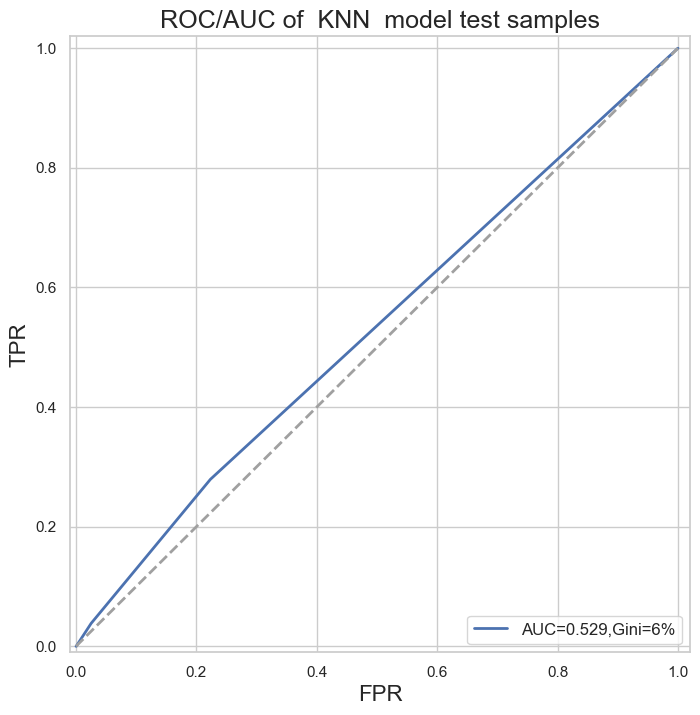

(0.5286958088961147, 5.74)

In [21]:
# KNN
Knn = KNeighborsClassifier()
Knn_score = cross_val_score(Knn, X_train, y_train, scoring='f1_weighted',cv=5)
Knn_score = round(Knn_score.mean()*100,2)
print(Knn_score)
pltROC(Knn,' KNN ',X_train,y_train,X_test, y_test)

d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

92.37


d:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


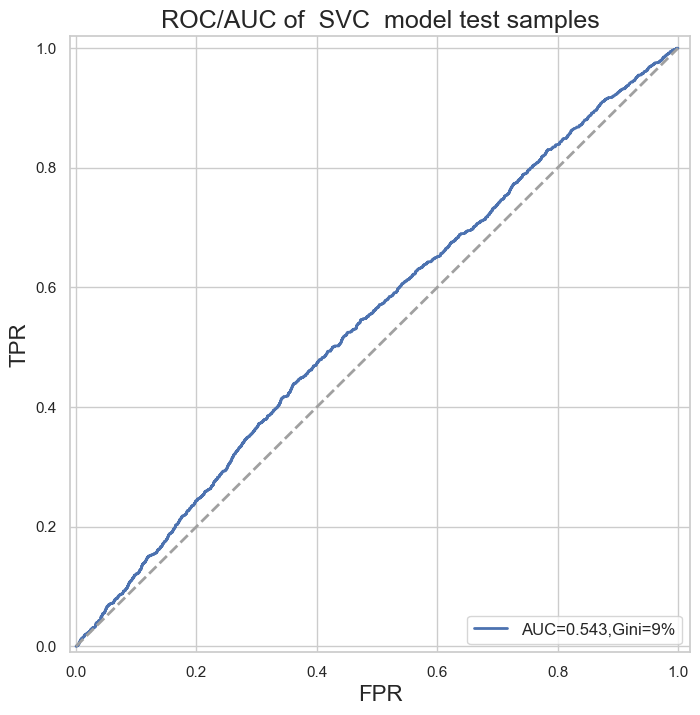

(0.5427378614995295, 8.55)

In [22]:
# svc
svm = SVC(random_state=123)
svm_score = cross_val_score(svm, X_train, y_train, scoring='f1_weighted',cv=5)
svm_score = round(svm_score.mean()*100,2)
print(svm_score)
pltROC(svm,' SVC ',X_train,y_train,X_test, y_test)

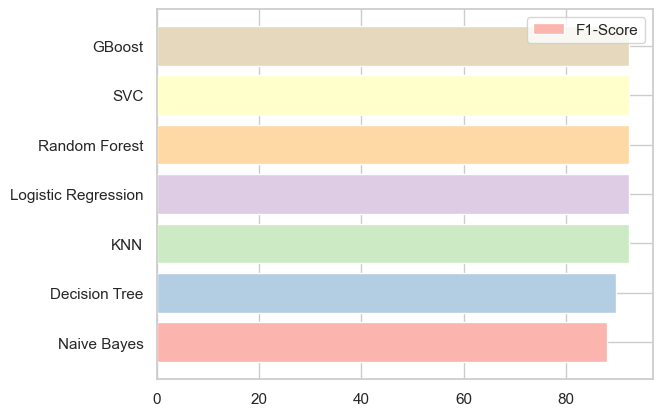

In [23]:
models = pd.DataFrame({
    'Model': ['SVC', 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree',
              'Naive Bayes', 'GBoost'],
        'train_Score': [svm_score, Knn_score, log_score,
              random_forest_score, decision_tree_score, bys_score, GB_forest_score]
})

index=models.sort_values(by='train_Score', ascending=True).index
data_plot=models.loc[index,:]
colors = plt.get_cmap('Pastel1')
plt.barh(data_plot.Model,data_plot.train_Score,color=colors(range(len(data_plot['Model'])))) # 对每个特征绘制总数状图
plt.legend(['F1-Score'])


In [24]:
# GB_forest
GB_forest.fit(X_train,y_train)
# Predict values using the training data
GBoost_predict_train = GB_forest.predict(X_train)
GBoost_predict_test = GB_forest.predict(X_test)
# Accuracy
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_train, GBoost_predict_train) * 100))
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, GBoost_predict_test) * 100))

d:\Anaconda\envs\ml\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 94.89%
Accuracy: 94.96%


               Feature  Importance
11  Buy_Amount_Average    0.177758
10     Last_Buy_Amount    0.147348
1       First_Buy_Data    0.136578
3   Average_Buy_Amount    0.135127
2        Last_Buy_Data    0.131516
4      Frequency_Level    0.126833
9        Special_Buyer    0.076928
0      Customer_Income    0.030269
5              grade_D    0.019148
8              grade_G    0.010683
6              grade_E    0.007318
7              grade_F    0.000495


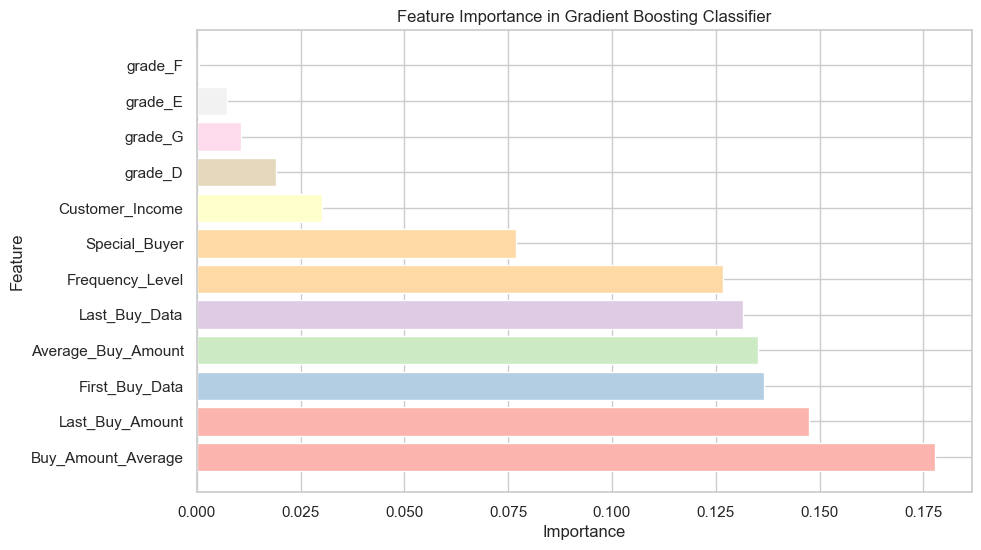

In [25]:
# 获取特征重要性
feature_importances = GB_forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_col_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
n = len(feature_importance_df)
colors = plt.cm.Pastel1(np.linspace(0, 1, n))
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'],color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.show()